<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Network Regression with Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


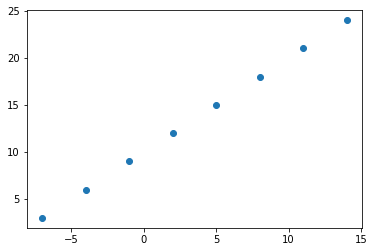

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

### Input and output shapes

In [3]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([996700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([996700], dtype=int32)>)

In [4]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

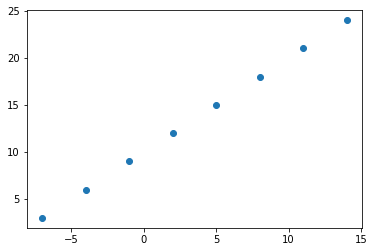

In [6]:
plt.scatter(X, y)

### Steps in Modelling with Tensorflow

In [7]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(1)
])

# 2. compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the Model
model.fit(X, y,epochs=5)



Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [8]:
# Predict using the trained model
y_pred = model.predict([17])
y_pred

array([[12.716021]], dtype=float32)

### Improving the Model

In [9]:
# 1. increasing the Epocs
model.fit(X, y,epochs=100, verbose=0)

In [10]:
y_pred = model.predict([17.])
y_pred

array([[30.19601]], dtype=float32)

In [11]:
# Changing the optimizer

# 1. Create a model using the sequential API
model= tf.keras.Sequential([                    
                            tf.keras.layers.Dense(1)
])

# 2. compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"])

# 3. Fit the Model
model.fit(X, y,epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
y_pred = model.predict([17.])
y_pred

array([[12.864841]], dtype=float32)

In [13]:
# Adding the hidden layer

# 1. Create a model using the sequential API
model= tf.keras.Sequential([                    
                            tf.keras.layers.Dense(100, activation="relu"),
                            tf.keras.layers.Dense(1)
])

# 2. compile the model

model.compile(loss="mae",
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the Model
model.fit(X, y,epochs=100, verbose=0)

In [14]:
y_pred = model.predict([17.])
y_pred

array([[31.223137]], dtype=float32)

In [15]:
# Adding the hidden layer and changing the optimizer

# 1. Create a model using the sequential API
model= tf.keras.Sequential([                    
                            tf.keras.layers.Dense(100, activation="relu"),
                            tf.keras.layers.Dense(1)
])

# 2. compile the model

model.compile(loss="mae",
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the Model
model.fit(X, y,epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
y_pred = model.predict([24.])
y_pred

array([[34.21104]], dtype=float32)

### Evaluating a model

In [17]:
# Make the larger set
X = tf.range(-100, 100,4)
y = X+10

X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

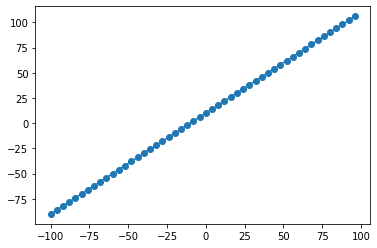

In [18]:
plt.plot(X, y)
plt.scatter(X,y)

* training set
* validation set
* test set

In [19]:
# Split the data into train and test set

X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

len(X_train) , len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

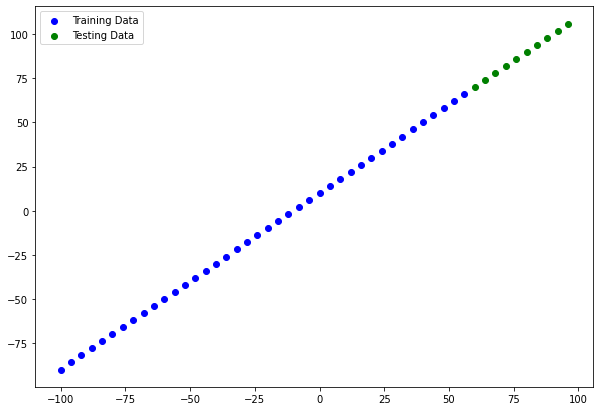

In [20]:
plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, c="b", label="Training Data")

plt.scatter(X_test, y_test, c="g", label="Testing Data")

plt.legend()

In [21]:
# onelayer model
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
                            tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the Model
#model.fit(X_train, y_train, epochs=100)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 3. Fit the Model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [24]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


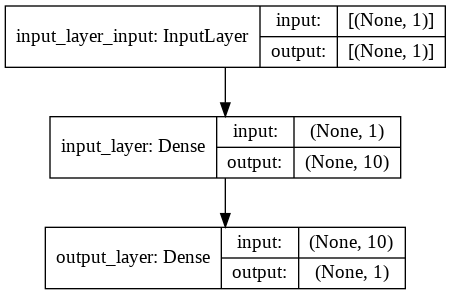

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualize the modelprediction

In [26]:
y_pred = model.predict(X_test)
y_pred

array([[ 70.55221 ],
       [ 75.13992 ],
       [ 79.72765 ],
       [ 84.31538 ],
       [ 88.9031  ],
       [ 93.49082 ],
       [ 98.07855 ],
       [102.666275],
       [107.254005],
       [111.84173 ]], dtype=float32)

In [27]:
def plot_pred(train_data = X_train,
              train_label = y_train,
              test_data = X_test,
              test_labels = y_test,
              prediction = y_pred):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_label, c="b", label="Training Data")

  plt.scatter(test_data, test_labels, c="g", label="Testing Data")

  plt.scatter(test_data, prediction,c="r", label="Prediction")

  plt.legend();

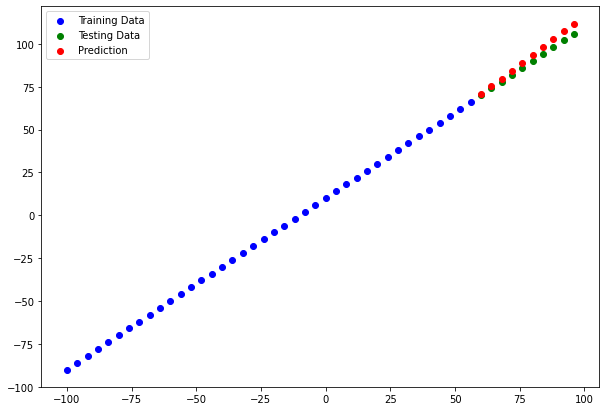

In [ ]:
plot_pred()

### Evaluating the metrics

In [28]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 140ms/step - loss: 3.1970 - mae: 3.1970


[3.1969642639160156, 3.1969642639160156]

In [30]:
# Mean absolute error
mae = tf.keras.losses.MAE(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558233, 14.116046, 11.708939, 10.336925, 10.      , 10.698164,
       12.447131, 15.33302 , 19.254005, 23.841728], dtype=float32)>

In [33]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55221 ,  75.13992 ,  79.72765 ,  84.31538 ,  88.9031  ,
        93.49082 ,  98.07855 , 102.666275, 107.254005, 111.84173 ],
      dtype=float32)>

In [35]:
# Mean absolute error
mae = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969643>

In [37]:
# mean squared error
mse = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.0703>

In [45]:
def mae(y_test, y_pred):
  return tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))

def mse(y_test, y_pred):
  return tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

### Tensor flow experiments to increase the metrics

In [38]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

Model-1

In [41]:
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model_1= tf.keras.Sequential([
                            tf.keras.layers.Dense(1)])

# 2. compile the model

model_1.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the Model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

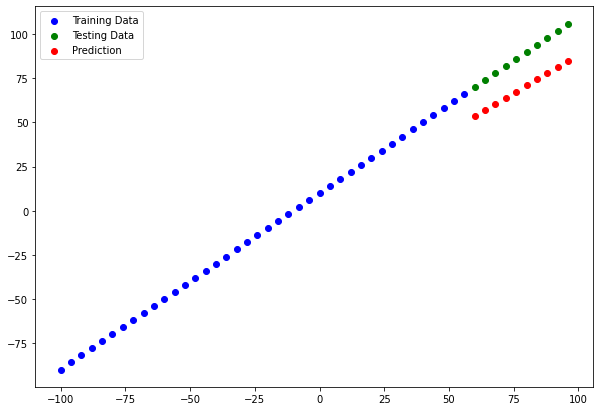

In [43]:
# Evaluating the Metrics
y_pred_1 = model_1.predict(X_test)
plot_pred(prediction=y_pred_1)

In [47]:
mae_1 = mae(y_test,y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

Model-2

In [58]:
# two layer model
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model_2= tf.keras.Sequential([
                            tf.keras.layers.Dense(100, activation="relu"),
                            tf.keras.layers.Dense(1)])

# 2. compile the model

model_2.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mse"])

# 3. Fit the Model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

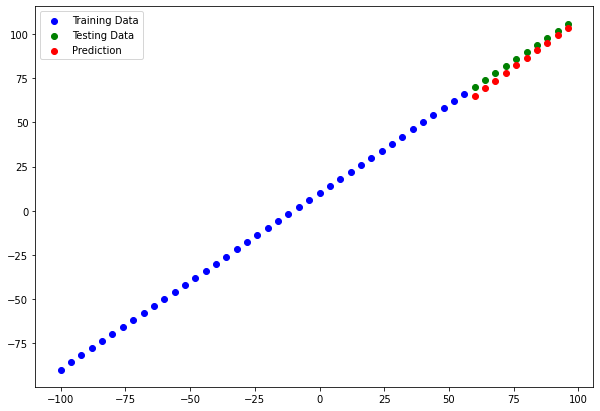

In [59]:
# Evaluating the Metrics
y_pred_2 = model_2.predict(X_test)
plot_pred(prediction=y_pred_2)

In [60]:
mae_2 = mae(y_test,y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.5793526>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.517387>)

Model-3

In [61]:
# 500 epocs
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model_3= tf.keras.Sequential([
                            tf.keras.layers.Dense(100, activation="relu"),
                            tf.keras.layers.Dense(1)])

# 2. compile the model

model_3.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mse"])

# 3. Fit the Model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

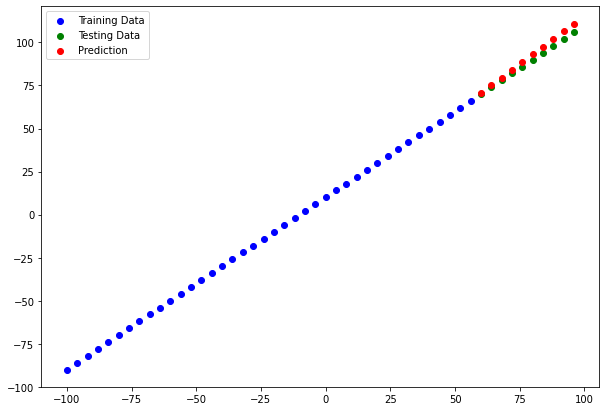

In [62]:
# Evaluating the Metrics
y_pred_3 = model_3.predict(X_test)
plot_pred(prediction=y_pred_3)

In [63]:
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=2.8092332>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.772123>)

Model-4

In [74]:
#1000 Epocs and 3 hidden layers
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model_4= tf.keras.Sequential([
                            tf.keras.layers.Dense(100, activation="relu"),
                            tf.keras.layers.Dense(1)])

# 2. compile the model

model_4.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the Model
model_4.fit(X_train, y_train, epochs=500, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


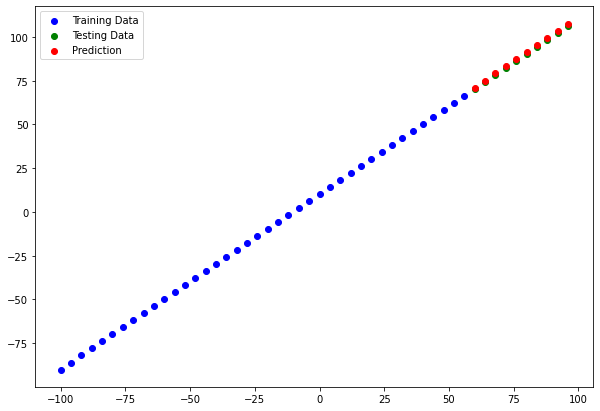

In [75]:
# Evaluating the Metrics
y_pred_4 = model_4.predict(X_test)
plot_pred(prediction=y_pred_4)

In [76]:
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=2.8092332>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.772123>)